In [33]:
# Dependencies
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [34]:
# Read JSON file
with open('data/plot_national.json') as plot_national_file:
    plot_national_dict = json.load(plot_national_file)

# Converting JSON data file into DataFrame "df"
df_plot_national = pd.DataFrame(plot_national_dict)

# Sort data by week number, start from week 1
df_plot_national = df_plot_national.sort_values(by=['week'])

# Convert vac_percent to percentage format
vac_percent = df_plot_national['vac_percent'] * 100
df_plot_national['vac_percent'] = vac_percent

# Decimal adjustment
df_national = df_plot_national.round({'flu_cases':0, 'flu_percent':2, "vac_percent":2, "vaccinations":0, "week":0})
df_national

,flu_cases,flu_percent,vac_percent,vaccinations,week
24,0.0,0.00,0.17,31422333.0,1.0
25,0.0,0.00,0.51,31422333.0,2.0
26,0.0,0.00,1.05,31422333.0,3.0
27,0.0,0.00,2.01,31422333.0,4.0
28,0.0,0.00,3.64,31422333.0,5.0
29,0.0,0.00,6.46,31422333.0,6.0
30,0.0,0.00,10.14,31422333.0,7.0
31,0.0,0.00,14.66,31422333.0,8.0
32,0.0,0.00,20.33,31422333.0,9.0
0,13021.0,1.40,25.60,31422333.0,10.0


In [35]:
# Data Clean, we only need the data from flu season
df_national_flu_season = df_national.loc[df_national['week']>=10,:]
df_national_flu_season = df_national_flu_season.loc[df_national_flu_season['week']<=25,:]
df_national_flu_season

,flu_cases,flu_percent,vac_percent,vaccinations,week
0,13021.0,1.40,25.60,31422333.0,10.0
1,13291.0,1.43,30.39,31422333.0,11.0
2,14357.0,1.54,34.27,31422333.0,12.0
3,15845.0,1.71,37.22,31422333.0,13.0
4,17081.0,1.84,39.58,31422333.0,14.0
5,18972.0,2.04,41.46,31422333.0,15.0
6,21784.0,2.34,42.33,31422333.0,16.0
7,19715.0,2.12,43.45,31422333.0,17.0
8,23692.0,2.55,44.38,31422333.0,18.0
9,24812.0,2.67,45.12,31422333.0,19.0


In [36]:
x_axis = df_national_flu_season["week"]
y_axis_1 = df_national_flu_season["flu_percent"]
y_axis_2 = df_national_flu_season["vac_percent"]
width = 0.4

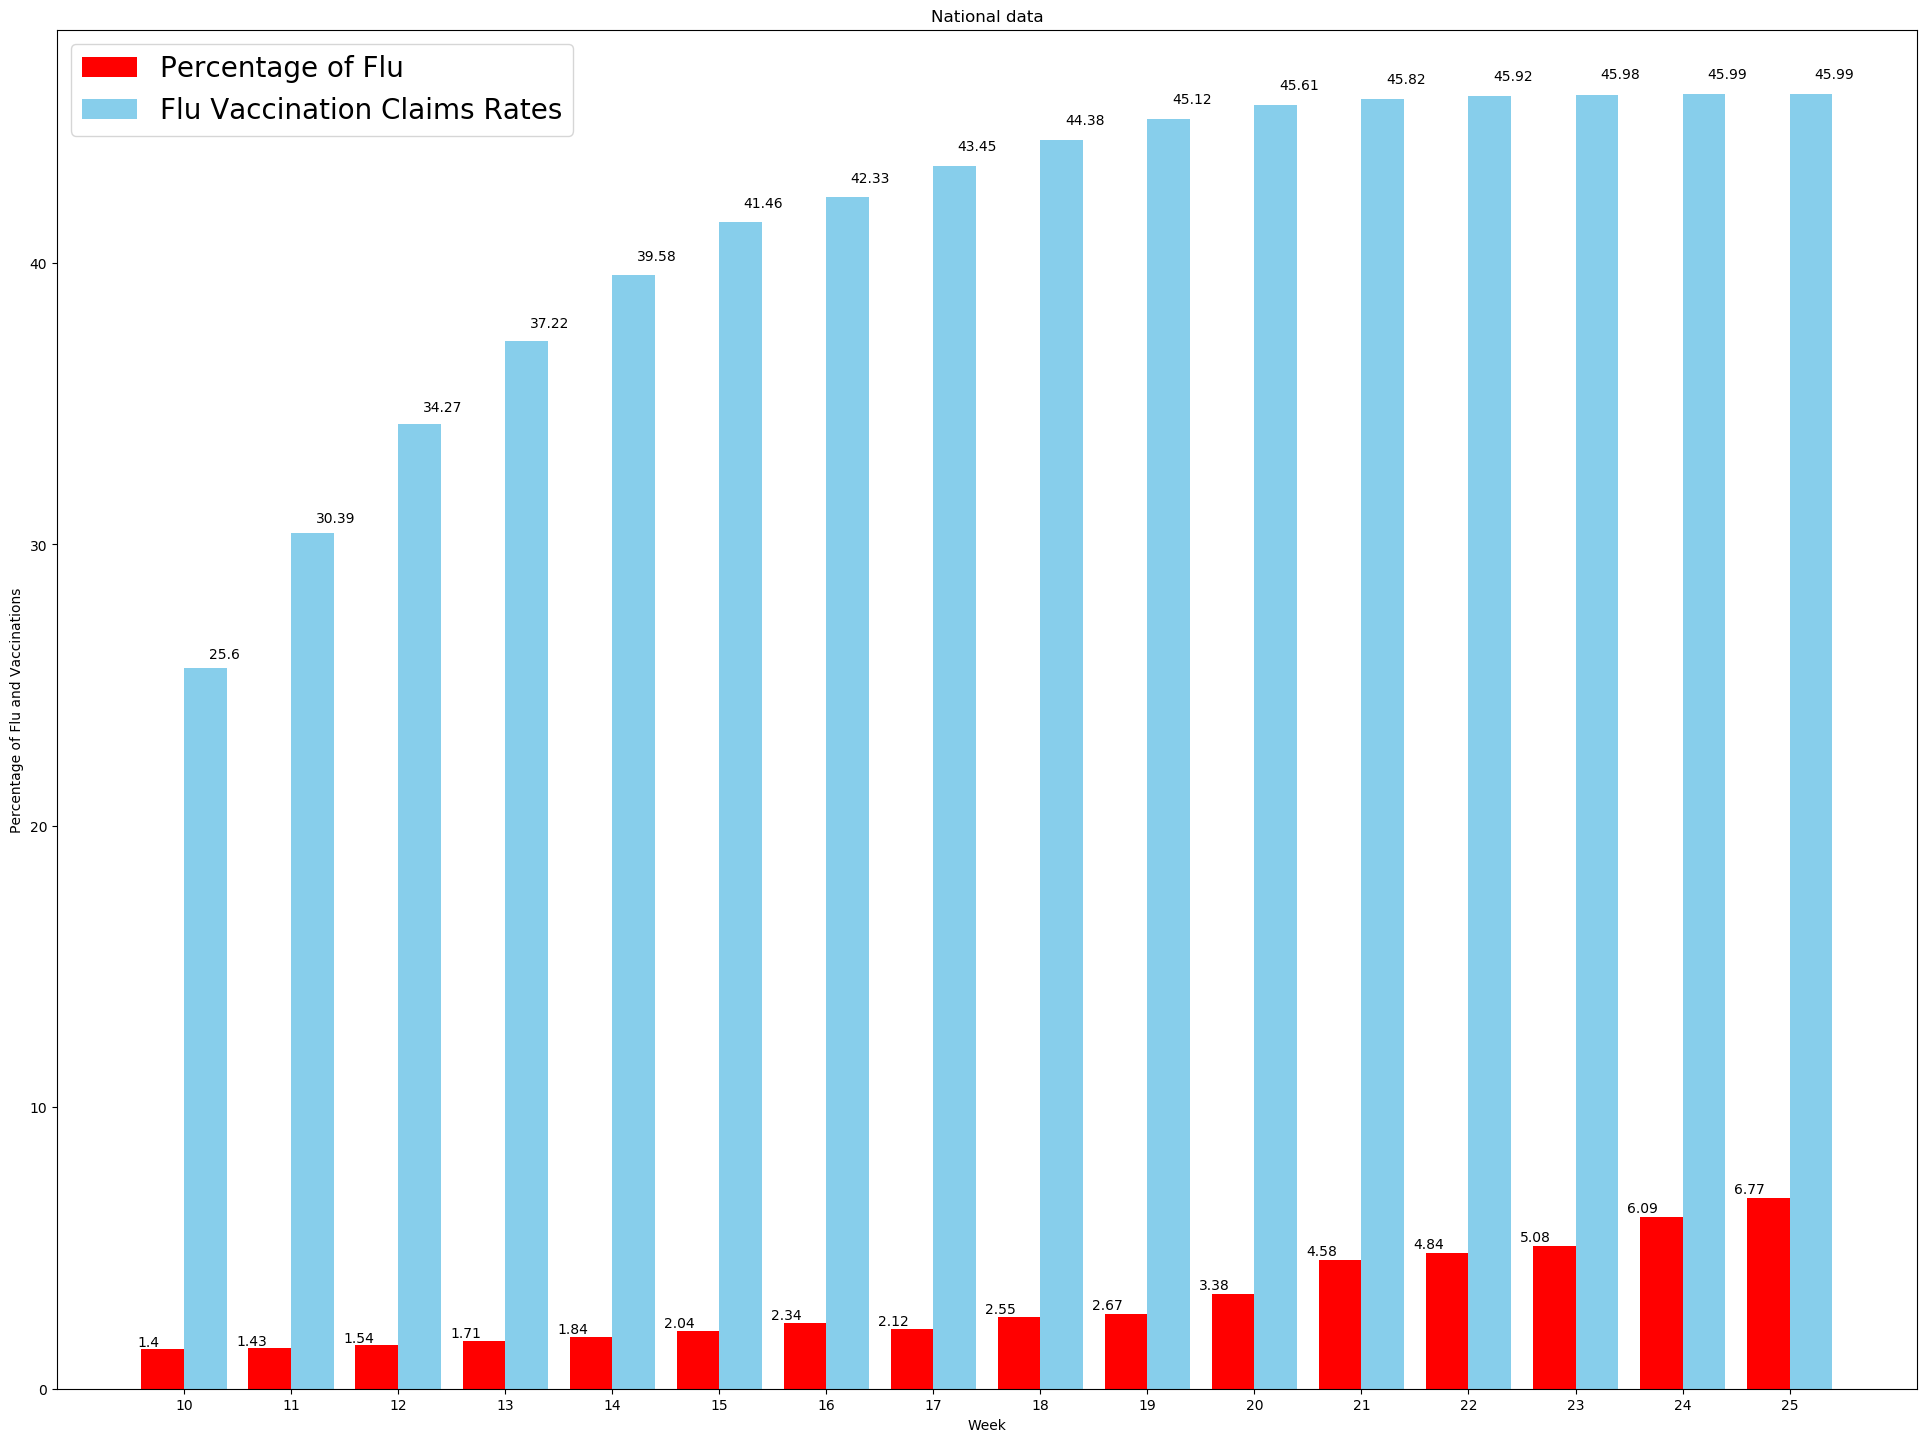

In [37]:
fig, ax = plt.subplots(figsize=(24, 18), dpi=100, facecolor='w', edgecolor='k')
rects1 = ax.bar(x_axis - width/2, y_axis_1, width, color="Red", label="Percentage of Flu")
rects2 = ax.bar(x_axis + width/2, y_axis_2, width, color="SkyBlue", label="Flu Vaccination Claims Rates")

# Add some text for labels, title and custom x_axis tick labrls
ax.set_xlabel('Week')
ax.set_ylabel('Percentage of Flu and Vaccinations')
ax.set_title('National data')
ax.set_xticks(x_axis)
ax.legend()

ax.legend(loc=2, prop={'size': 20})

def autolabel(rects, xpos="center"):
    xpos = xpos.lower()
    ha = {'center':'center', 'right':'left', "left":'right'}
    offset = {'center':0.5, 'right':0.57, 'left':0.43}
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height, '{}'.format(height), ha=ha[xpos], va='bottom')

autolabel(rects1, "left")
autolabel(rects2, "right")

plt.show()
plt.savefig('national_data.png')